<a href="https://colab.research.google.com/github/leajag/2024_Intro_Python/blob/main/LeaJaeggi_W4_S1_finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Multivariate linear regression and clustering

What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

## Exercise 1: Multivariate linear regression

### Q1: Use pandas to import the advertising dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
import urllib.request
import pandas as pd

In [4]:
myadvertising = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EeqnI6nF9iBAkUOACbZ3mWUBDZ8N5mVP1oOaFd4vy6tIzw?download=1',
                          known_hash='69104adc017e75d7019f61fe66ca2eb4ab014ee6f2a9b39b452943f209352010')

In [5]:
# Q1a: Use pandas to import the dataset
advertising = pd.read_csv(myadvertising)

In [6]:
# Q1b: Display the first rows of the data with pandas
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"

This model will basically tell us how sales would change if we put resources to advertise products in three different medias. The [Linear Regression documentation is at this link](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html).

In [7]:
# Import the linear regression model you wish to use
from sklearn.linear_model import LinearRegression

# instantiate, fit, and predict:
# (Reshape your data either using array.reshape(-1, 1) if your data has a single feature
# or array.reshape(1, -1) if it contains a single sample.)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


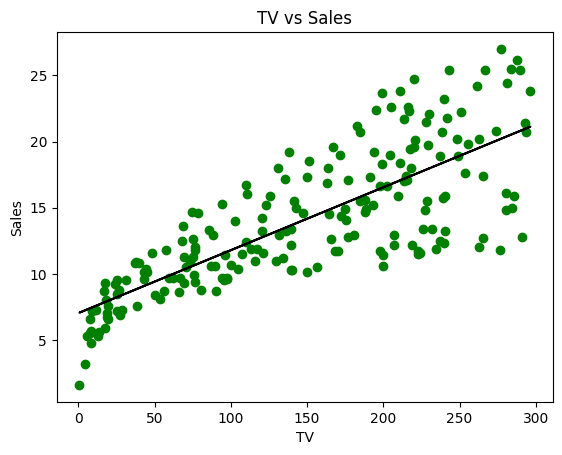

In [8]:
x = advertising[["TV"]].values
y = advertising["Sales"].values
TV_vs_sales = linreg = LinearRegression()
linreg.fit(x, y)

plt.scatter(advertising['TV'], advertising['Sales'], color = "green")
plt.plot(advertising['TV'], linreg.predict(advertising[['TV']]), color = "black")
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Construct Input / Output matrices
# and instantiate / train a linear regression model



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


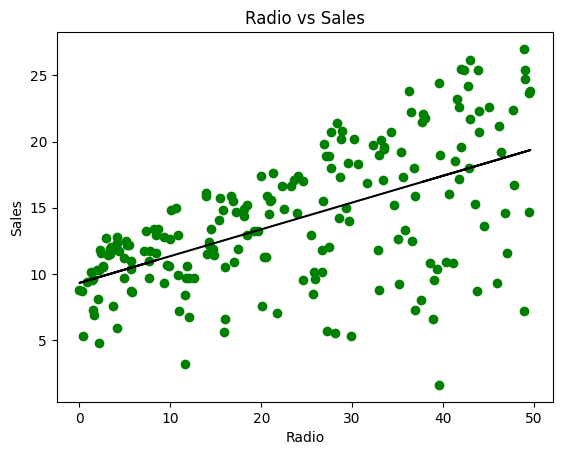

In [9]:
x = advertising[["Radio"]].values
y = advertising["Sales"].values
linreg = LinearRegression()
linreg.fit(x, y)

plt.scatter(advertising['Radio'], advertising['Sales'], color = "green")
plt.plot(advertising['Radio'], linreg.predict(advertising[['Radio']]), color = "black")
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


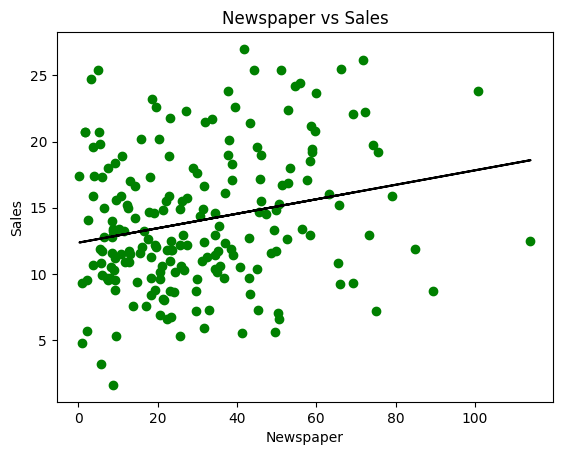

In [18]:
x = advertising[["Newspaper"]].values
y = advertising["Sales"].values
linreg = LinearRegression()
linreg.fit(x, y)

plt.scatter(advertising['Newspaper'], advertising['Sales'], color = "green")
plt.plot(advertising['Newspaper'], linreg.predict(advertising[['Newspaper']]), color = "black")
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

### Q3: Print out the linear equation coefficients and intercept

Hints:

(1) When you print the coefficients and intercepts, try to retain only the first two digits. One way to do it is through the `.round()` function in `numpy`

(2) Check out the scikit-learn `linear-model` module for instructions on extracting the coefficients and intercepts of the trained model.


In [10]:
coef = TV_vs_sales.coef_
interv = TV_vs_sales.intercept_

coef_r = round(coef[0], 2)
interv_r = round(interv, 2)


print("Coefficient TV vs. Sales:", coef_r)
print("Interval TV vs. Sales:", interv_r)

Coefficient TV vs. Sales: 0.05
Interval TV vs. Sales: 7.03


## Exercise 2: Clustering Penguin Dataset

In the exercise, we will try to repeat the k-mean clustering procedure introuduced in the tutorial, but on a different 2D variable plane.

Let's try "culmen_length_mm" and "Flipper_length_mm"?

Can we differentiate penguins from the length of the beak and their wings?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

In [11]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


### Q1: Data clean up. Remove all rows in the table if the rows contain missing values

Hint: `pandas` has a easy function for data clean up. Check out [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) for details.

In [30]:
peng_c = (penguins.dropna())


print(peng_c.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


### Q2: Create an input dataset `X` with the culmen_length_mm and flipper_length_mm data columns

Hints:

(1) The shape of your input data should be `(334, 2)`

In [13]:
# Create your input for model training here
# Input should contain penguin_df['culmen_length_mm'] and penguin_df['flipper_length_mm']
X = peng_c[['culmen_length_mm', 'flipper_length_mm']]

In [14]:
X.shape

(334, 2)

### Q3: Train a K-means clustering algorithm, and perform an elbow test followed by silhouette analysis

Hints:

(1) The documentation for KMeans clustering can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

(2) [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette+score#sklearn.metrics.silhouette_score) for silhouette score analysis in scikit-learn

In [19]:
#@title Skeleton code
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans
# Import Silhouette score fron scikit-learn
from sklearn.metrics import silhouette_score


In [21]:
Sum_of_squared_distances = []

K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)

In [22]:
#@title Skeleton code
# Store the K-means inertia in an empty list
inertia = []
K = range(1,10)

for num_clusters in K: # This will iterate from 1 to 10 (inclusive)
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    inertia.append(kmeans.inertia_) # Append the inertia to the list


In [ ]:
# To finish the elbow method analysis,
# plot the change in inertia when you change the number of clusters
# you used to train the k-means clustering algorithm.



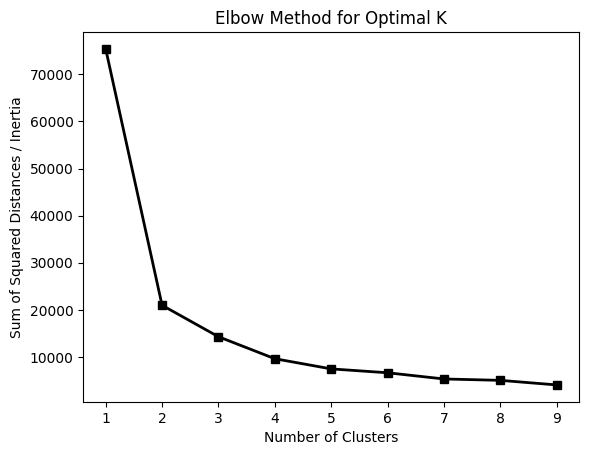

In [23]:
#@title Skeleton code
# To finish the elbow method analysis, plot the change in inertia when you change the number of clusters you used to train the k-means clustering algorithm.
plt.plot(K,inertia,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

This is what your TA got after filling in and running the skeleton code.

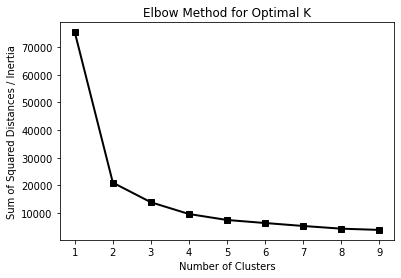

In [ ]:
# Perform silhouette analysis following instructions in the tutorial notebook


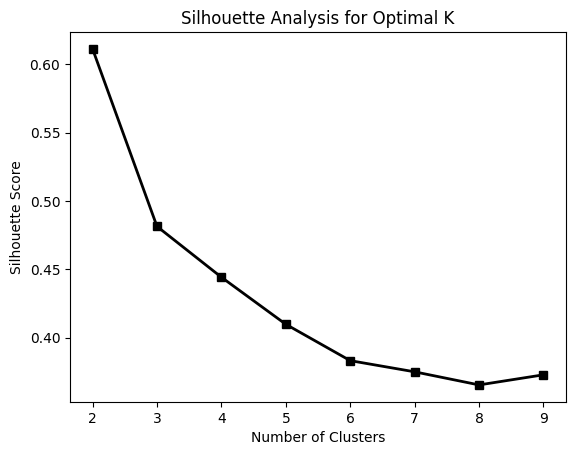

In [24]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range(2,10),silhouette_avg,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [25]:
#@title Skeleton code
silhouette_avg = []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

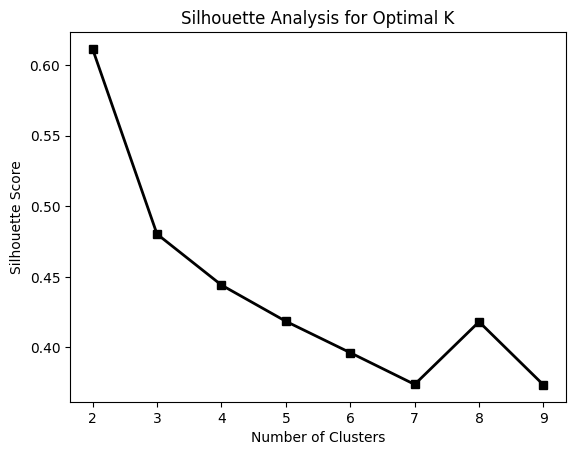

In [26]:
plt.plot(range(2,10),silhouette_avg,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

Here is a screenshot of how the results should look like.

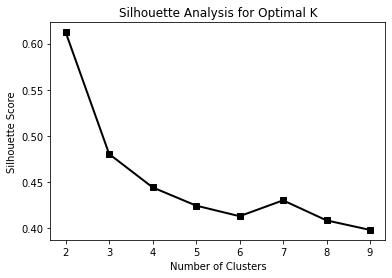

Based on the silhouette and elbow analysis, it seems the either 2 or 3 clusters is suitable for this penguin dataset.

### Q4: Perform KMeans clustering with 3 clusters

In [ ]:
# Train a k-means clustering model with 3 clusters


In [ ]:
# Use the model to label all data points


In [45]:
import numpy as np
X = np.vstack((peng_c['culmen_length_mm'],peng_c['flipper_length_mm'])).T


In [47]:
#@title Skeleton code
# Train a k-means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Use the model to label all data points
y_kmeans = kmeans.predict(X)


Now, our penguin dataset is labelled. So we can compare our clustering results with the truth to see how well our trained model performed.

First store the predicted labels in the pandas dataframe

In [49]:
# Store the predicted labels in a new index
peng_c['cluster'] = y_kmeans

<ipython-input-49-80d2b7d92a00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peng_c['cluster'] = y_kmeans


Then extract the culmen_length_mm and flipper_length_mm of the three penguin categories as truth

In [42]:
peng_c

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


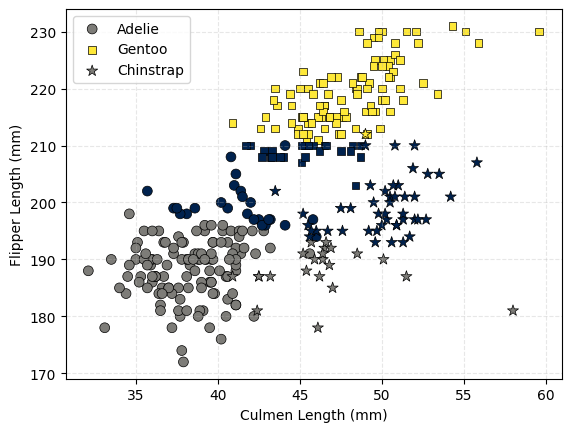

In [53]:
plt.scatter(peng_c[peng_c['species']=='Adelie']['culmen_length_mm'], peng_c[peng_c['species']=='Adelie']['flipper_length_mm'],
            c=peng_c[peng_c['species']=='Adelie']['cluster'],
            s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(peng_c[peng_c['species']=='Gentoo']['culmen_length_mm'], peng_c[peng_c['species']=='Gentoo']['flipper_length_mm'],
            c=peng_c[peng_c['species']=='Gentoo']['cluster'],
            s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.scatter(peng_c[peng_c['species']=='Chinstrap']['culmen_length_mm'], peng_c[peng_c['species']=='Chinstrap']['flipper_length_mm'],
            c=peng_c[peng_c['species']=='Chinstrap']['cluster'],
            s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=0,vmax=2)
plt.grid(linestyle='--',alpha=0.3)
plt.ylabel('Flipper Length (mm)')
plt.xlabel('Culmen Length (mm)')
plt.legend()
plt.show()

In [ ]:
# Adelie
# Gentoo
# Chinstrap

Recreate the figure below

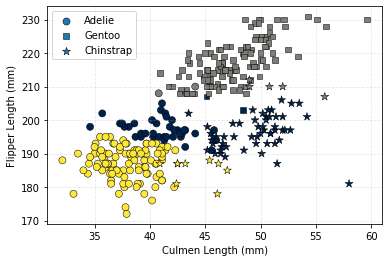

In [ ]:
# Script to recreate the figure


In [ ]:
#@title Skeleton code
plt.scatter(_____, _________,c=_______,s=50,marker=___,label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=___,vmax=___)
plt.scatter(_____, _________,c=_______,s=30,marker=___,label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=___,vmax=___)
plt.scatter(_____, _________,c=_______,s=70,marker=___,label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=____,vmax=____)
plt.______(__________)
plt.ylabel(___________)
plt.xlabel(___________)
plt._________
plt.show()

### Q5: Train the KMeans clustering with 2 clusters

In [ ]:
# Train k-means clustering algorithm here

# Predict labels


We got this figure with our model. Can you recreate it?

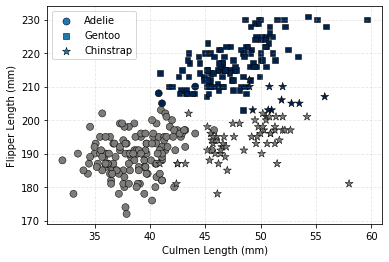